## **Early Engagement Intensity and Customer Trajectories**

The goal of this notebook is to analyze how customers behave immediately after entering the business. 

Rather than focusing on inactivity, this analysis examines differences in early engagement and searches for early lifecycle patterns among customers building on dataset from Consumer-Behavior---Spending-Analysis.


## **Core Questions**

This notebook will attempt to answer following questions:

- Do all customers engage at similar levels in their first 30 days?

- Can customers be grouped based on early engagement intensity?

- How common are low, moderate, and high early engagement patterns?

- How do early engagement trajectories differ across customer segments?


## **Early Engagement Classification**

Customers are classified based on the number of transactions they make within their first 30 days:

1. **Low Engagement Customers**: 1–2 transactions  
2. **Moderate Engagement Customers**: 3–10 transactions  
3. **High Engagement Customers**: More than 10 transactions  




In [30]:
import kagglehub
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#downloading the latest version of the dataset
path = kagglehub.dataset_download("priyamchoksi/credit-card-transactions-dataset")

print(os.listdir(path)) # shows the list of all folders and files inside the directory

csv_path = os.path.join(path,'credit_card_transactions.csv') # creates a path from directory to the file

ds = pd.read_csv(csv_path) 

df = pd.DataFrame(ds)

df


['credit_card_transactions.csv']


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0,NaN
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0,22630.0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0,88351.0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0,69367.0


In [31]:
#checking if there are any duplicates

is_duplicate = df.duplicated().any()
is_duplicate

np.False_

In [32]:
#checking for missing values

is_missing = df.isna().any()

is_missing.value_counts()

#making a dictionary to store missing value counts
columns_with_missing_values = {}

for column in df.columns:
    missing_count = df[column].isna().sum()
    
    if missing_count > 0:
        columns_with_missing_values[column] = missing_count

columns_with_missing_values

{'merch_zipcode': np.int64(195973)}

In [33]:
#renaming and cleaning up some columns for more clarity

df = df.rename(columns= {"first": "first_name", "last": "last_name", "category": "spending_type"})
df = df.drop("Unnamed: 0", axis=1)
df

,trans_date_trans_time,cc_num,merchant,spending_type,amt,first_name,last_name,gender,street,city,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,...,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0,NaN
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,...,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0,22630.0
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,...,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0,88351.0
1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,Manderson,...,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0,69367.0


In [34]:
#filling in merch_zipcode NaN values

df["merch_zipcode"] = df["merch_zipcode"].fillna("Unknown")
df

,trans_date_trans_time,cc_num,merchant,spending_type,amt,first_name,last_name,gender,street,city,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,Unknown
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,Unknown
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,...,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0,Unknown
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,...,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0,22630.0
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,...,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0,88351.0
1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,Manderson,...,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0,69367.0


In [35]:
#converting trans_date_trans_time to datetime
df["trans_date_trans_time"] = pd.to_datetime(df["trans_date_trans_time"])



In [36]:
#checking when did the first transaction of a customer happen
first_purchase = (
    df.groupby("cc_num")["trans_date_trans_time"]
      .min()
      .reset_index(name="first_purchase_date")
)
first_purchase

,cc_num,first_purchase_date
0,60416207185,2019-01-01 12:47:15
1,60422928733,2019-01-03 18:38:26
2,60423098130,2019-01-01 06:48:36
3,60427851591,2019-01-01 07:36:27
4,60487002085,2019-01-06 03:23:55
...,...,...
978,4958589671582726883,2019-01-01 01:38:31
979,4973530368125489546,2019-01-03 12:31:03
980,4980323467523543940,2019-01-02 07:45:21
981,4989847570577635369,2019-01-02 13:15:20


In [37]:
#dividing customers into new and returning ones
#new customer is one whose transaction date equals first purchase date
#returning customer is one whose transaction date doesn't equal first purchase date

df = df.merge(first_purchase, on="cc_num", how="left") #merging the pivot table so we can compare the two dates


def customer_label(row):
    if row["trans_date_trans_time"] == row["first_purchase_date"]:
        return "New Customer"
    else:
        return "Returning Customer"

df["customer_label"] = df.apply(customer_label, axis=1) #creating a new column to show if it's a new or returning customer

df

,trans_date_trans_time,cc_num,merchant,spending_type,amt,first_name,last_name,gender,street,city,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode,first_purchase_date,customer_label
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0,2019-01-01 00:00:18,New Customer
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,Unknown,2019-01-01 00:00:44,New Customer
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0,2019-01-01 00:00:51,New Customer
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,Unknown,2019-01-01 00:01:16,New Customer
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0,2019-01-01 00:03:06,New Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,...,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0,Unknown,2019-01-01 09:42:51,Returning Customer
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,...,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0,22630.0,2019-01-01 05:40:03,Returning Customer
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,...,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0,88351.0,2019-01-01 00:09:03,Returning Customer
1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,Manderson,...,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0,69367.0,2019-01-01 03:37:04,Returning Customer


In [38]:
#seeing how many are new and how many are returning customers
df["customer_label"].value_counts()



customer_label
Returning Customer    1295692
New Customer              983
Name: count, dtype: int64

In [39]:
#finding the month of the first purchase

first_purchase["first_purchase_month"] = (
    first_purchase["first_purchase_date"]
    .dt.to_period("M")
)

#counting customers per month
new_customers_per_month = (
    first_purchase.groupby("first_purchase_month")["cc_num"]
    .nunique()
    .reset_index(name="new_customers")
)
new_customers_per_month

,first_purchase_month,new_customers
0,2019-01,913
1,2019-02,9
2,2019-03,8
3,2019-04,5
4,2019-05,1
5,2019-07,2
6,2019-08,3
7,2019-09,5
8,2019-10,4
9,2019-11,3


In [40]:
#checking to see if each customer have exactly one “New Customer” transaction?
new_counts_per_customer = (
    df.assign(is_new=df["customer_label"].eq("New Customer"))
      .groupby("cc_num")["is_new"]
      .sum()
)

new_counts_per_customer.value_counts()


is_new
1    983
Name: count, dtype: int64

In [41]:
#checking whether activity is driven by new customers or returning customers over time
monthly_mix = (
    df.groupby([pd.Grouper(key="trans_date_trans_time", freq="M"), "customer_label"])
      .size()
      .reset_index(name="transactions")
)

monthly_mix["trans_date_trans_time"] = monthly_mix["trans_date_trans_time"].dt.to_period("M").astype(str)
monthly_mix.head()


/var/folders/dp/8_ff0nm97bz6dbzpgg7jcvmm0000gn/T/ipykernel_48763/1003797046.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.groupby([pd.Grouper(key="trans_date_trans_time", freq="M"), "customer_label"])


,trans_date_trans_time,customer_label,transactions
0,2019-01,New Customer,913
1,2019-01,Returning Customer,51612
2,2019-02,New Customer,9
3,2019-02,Returning Customer,49857
4,2019-03,New Customer,8


In [42]:
#inspecting what do customers do right after their first purchase
df["days_since_first_purchase"] = (df["trans_date_trans_time"] - df["first_purchase_date"]).dt.days

df_30d = df[df["days_since_first_purchase"].between(0, 30)].copy()

early_metrics = (
    df_30d.groupby("cc_num")
          .agg(
              txn_30d=("amt", "count"),
              spend_30d=("amt", "sum")
          )
          .reset_index()
)

early_metrics.describe()


,cc_num,txn_30d,spend_30d
count,9.830000e+02,983.000000,983.000000
mean,4.187596e+17,54.868769,4312.256358
std,1.306864e+18,32.911751,2792.011180
min,6.041621e+10,7.000000,420.780000
25%,1.800393e+14,24.000000,2193.920000
50%,3.525591e+15,51.000000,3741.750000
75%,4.664025e+15,77.500000,5765.780000
max,4.992346e+18,161.000000,15548.390000


In [ ]:
early_engagement = (
    df_30d.groupby("cc_num")
          .agg(
              txn_30d=("amt", "count"),                    # number of transactions in the last 30 days
              spend_30d=("amt", "sum"),                    # total spending in the last 30 days
              avg_txn_value_30d=("amt", "mean"),           # average transaction value in the last 30 days
              active_days_30d=("trans_date_trans_time",    # number of unique active days in the last 30 days
                                lambda x: x.dt.date.nunique())
          )
          .reset_index()
)

early_engagement

,cc_num,txn_30d,spend_30d,avg_txn_value_30d,active_days_30d
0,60416207185,56,2410.54,43.045357,27
1,60422928733,54,2786.68,51.605185,25
2,60423098130,28,1287.15,45.969643,21
3,60427851591,24,2757.68,114.903333,17
4,60487002085,18,805.09,44.727222,13
...,...,...,...,...,...
978,4958589671582726883,56,3275.15,58.484821,24
979,4973530368125489546,56,4018.37,71.756607,26
980,4980323467523543940,24,1591.47,66.311250,16
981,4989847570577635369,39,3689.30,94.597436,22


In [46]:
early_engagement.describe()


,cc_num,txn_30d,spend_30d,avg_txn_value_30d,active_days_30d
count,9.830000e+02,983.000000,983.000000,983.000000,983.000000
mean,4.187596e+17,54.868769,4312.256358,112.112299,22.070193
std,1.306864e+18,32.911751,2792.011180,149.205633,8.027711
min,6.041621e+10,7.000000,420.780000,26.619737,1.000000
25%,1.800393e+14,24.000000,2193.920000,51.798611,17.000000
50%,3.525591e+15,51.000000,3741.750000,66.311250,25.000000
75%,4.664025e+15,77.500000,5765.780000,90.580494,28.000000
max,4.992346e+18,161.000000,15548.390000,948.818182,32.000000


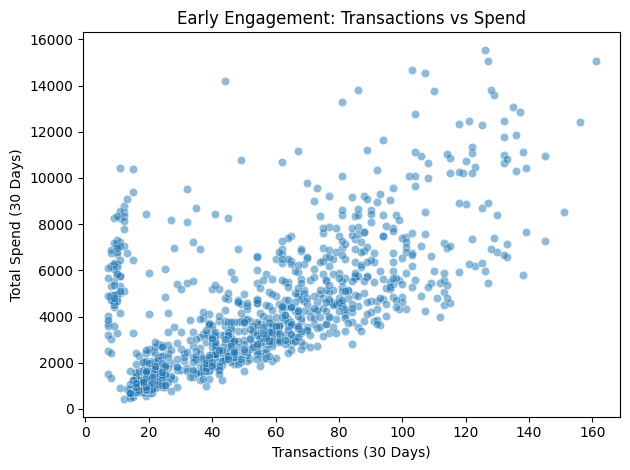

In [ ]:
#making a scatterplot for early engagement

fig, ax = plt.subplots()

sns.scatterplot(
    data=early_engagement,
    x="txn_30d",
    y="spend_30d",
    alpha=0.5,
    ax = ax
    
)
ax.set_title("Early Engagement: Transactions vs Spend")
ax.set_xlabel("Transactions (30 Days)")
ax.set_ylabel("Total Spend (30 Days)")
plt.tight_layout()


In [58]:
#function to divide cutomers into engagement groups based on the count of transactions
def engagement_segment(txn_count):
    if txn_count <= 2:
        return "Low Engagement"
    elif txn_count <= 10:
        return "Moderate Engagement"
    else:
        return "High Engagement"

early_engagement["engagement_segment"] = (
    early_engagement["txn_30d"].apply(engagement_segment)
)

early_engagement

,cc_num,txn_30d,spend_30d,avg_txn_value_30d,active_days_30d,engagement_segment
0,60416207185,56,2410.54,43.045357,27,High Engagement
1,60422928733,54,2786.68,51.605185,25,High Engagement
2,60423098130,28,1287.15,45.969643,21,High Engagement
3,60427851591,24,2757.68,114.903333,17,High Engagement
4,60487002085,18,805.09,44.727222,13,High Engagement
...,...,...,...,...,...,...
978,4958589671582726883,56,3275.15,58.484821,24,High Engagement
979,4973530368125489546,56,4018.37,71.756607,26,High Engagement
980,4980323467523543940,24,1591.47,66.311250,16,High Engagement
981,4989847570577635369,39,3689.30,94.597436,22,High Engagement


In [69]:
#checking the proportions of engagement_segment column from early engagement
segment_counts = (
    early_engagement["engagement_segment"]
    .value_counts(normalize=True)
    .reset_index()
)

segment_counts


,engagement_segment,proportion
0,High Engagement,0.949135
1,Moderate Engagement,0.050865


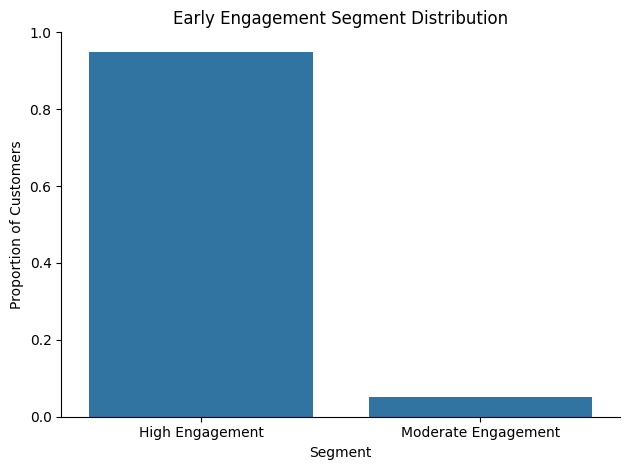

In [91]:
#making a barchart for customer segment and proportion of customers
fig, ax = plt.subplots()

sns.barplot(
    data=segment_counts,
    x="engagement_segment",
    y="proportion",
    ax=ax
)
ax.set_title("Early Engagement Segment Distribution")
ax.set_xlabel("Segment")
ax.set_ylabel("Proportion of Customers")
ax.set_ylim(0,1)
plt.tight_layout()
sns.despine()

In [ ]:
#making a table that compares early_engagement on other metrics
early_engagement.groupby("engagement_segment").agg(
    customers=("cc_num", "count"),
    avg_txn_30d=("txn_30d", "mean"),
    avg_spend_30d=("spend_30d", "mean"),
    avg_active_days=("active_days_30d", "mean")
)


,customers,avg_txn_30d,avg_spend_30d,avg_active_days
engagement_segment,,,,
High Engagement,933,57.34298,4265.786988,23.146838
Moderate Engagement,50,8.70000,5179.374800,1.980000


In [ ]:
#merging the dataframe of 30 days dataframe with early_engagement in order to know to which engagement_segment every customer belongs to
df_30d = df_30d.merge(
    early_engagement[["cc_num", "engagement_segment"]],
    on="cc_num",
    how="left"
)
df_30d

,trans_date_trans_time,cc_num,merchant,spending_type,amt,first_name,last_name,gender,street,city,...,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode,first_purchase_date,customer_label,days_since_first_purchase,engagement_segment
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0,2019-01-01 00:00:18,New Customer,0,High Engagement
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,Unknown,2019-01-01 00:00:44,New Customer,0,High Engagement
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0,2019-01-01 00:00:51,New Customer,0,High Engagement
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,Unknown,2019-01-01 00:01:16,New Customer,0,High Engagement
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0,2019-01-01 00:03:06,New Customer,0,High Engagement
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53931,2020-06-14 23:49:46,503886119844,fraud_Boyer-Reichert,shopping_net,1108.11,Cameron,Johns,M,9383 Garrison Inlet Apt. 548,Freeport,...,2c97b63a13401eefb620a6d1913a8c27,1371253786,43.026900,-70.367103,1,Unknown,2020-06-14 01:56:32,Returning Customer,0,Moderate Engagement
53932,2020-06-15 05:47:16,503886119844,fraud_Strosin-Cruickshank,grocery_pos,312.87,Cameron,Johns,M,9383 Garrison Inlet Apt. 548,Freeport,...,b6e5176f8d0e89042674784c2076a1b3,1371275236,44.373888,-69.216299,1,4973.0,2020-06-14 01:56:32,Returning Customer,1,Moderate Engagement
53933,2020-06-15 16:57:49,503886119844,fraud_Kuphal-Bartoletti,misc_net,810.70,Cameron,Johns,M,9383 Garrison Inlet Apt. 548,Freeport,...,321454eb84e6b00e3cccdc6bf3d40640,1371315469,44.065434,-70.054754,1,4287.0,2020-06-14 01:56:32,Returning Customer,1,Moderate Engagement
53934,2020-06-15 22:14:17,503886119844,"fraud_Baumbach, Feeney and Morar",shopping_net,899.48,Cameron,Johns,M,9383 Garrison Inlet Apt. 548,Freeport,...,101d646c682a74e761bbc17ca719a48e,1371334457,44.007561,-70.106514,1,4250.0,2020-06-14 01:56:32,Returning Customer,1,Moderate Engagement


## **Early engagement trajectories**

To understand how engagement accumulates over time, transactions are grouped by day since first purchase and converted into cumulative counts. 

This allows for comparison of how quickly different engagement segments ramp up activity during the first 30 days.


In [ ]:
#counting number of transactions per day for each customer
daily_txns = (
    df_30d.groupby(["cc_num", "engagement_segment", "days_since_first_purchase"])
          .size()
          .reset_index(name="daily_txn_count")
)
daily_txns

,cc_num,engagement_segment,days_since_first_purchase,daily_txn_count
0,60416207185,High Engagement,0,4
1,60416207185,High Engagement,1,1
2,60416207185,High Engagement,2,2
3,60416207185,High Engagement,3,3
4,60416207185,High Engagement,4,2
...,...,...,...,...
21550,4992346398065154184,High Engagement,26,4
21551,4992346398065154184,High Engagement,27,5
21552,4992346398065154184,High Engagement,28,5
21553,4992346398065154184,High Engagement,29,1


In [ ]:
#transforming counting transaction per day per customer to cumulative transactions per customer. that way we can see how many days since first purchase have passed and how many total transactions happened since then.
daily_txns["cumulative_txns"] = (
    daily_txns
    .sort_values("days_since_first_purchase")
    .groupby("cc_num")["daily_txn_count"]
    .cumsum()
)
daily_txns

,cc_num,engagement_segment,days_since_first_purchase,daily_txn_count,cumulative_txns
0,60416207185,High Engagement,0,4,4
1,60416207185,High Engagement,1,1,5
2,60416207185,High Engagement,2,2,7
3,60416207185,High Engagement,3,3,10
4,60416207185,High Engagement,4,2,12
...,...,...,...,...,...
21550,4992346398065154184,High Engagement,26,4,66
21551,4992346398065154184,High Engagement,27,5,71
21552,4992346398065154184,High Engagement,28,5,76
21553,4992346398065154184,High Engagement,29,1,77


In [ ]:
#finding the average cumulative transactions across customers

trajectory = (
    daily_txns.groupby(["engagement_segment", "days_since_first_purchase"])
              .agg(avg_cumulative_txns=("cumulative_txns", "mean"))
              .reset_index()
)
trajectory

,engagement_segment,days_since_first_purchase,avg_cumulative_txns
0,High Engagement,0,3.319400
1,High Engagement,1,5.613772
2,High Engagement,2,6.959877
3,High Engagement,3,8.726597
4,High Engagement,4,10.743440
5,High Engagement,5,13.106267
6,High Engagement,6,15.852941
7,High Engagement,7,18.511822
8,High Engagement,8,20.646865
9,High Engagement,9,21.807692


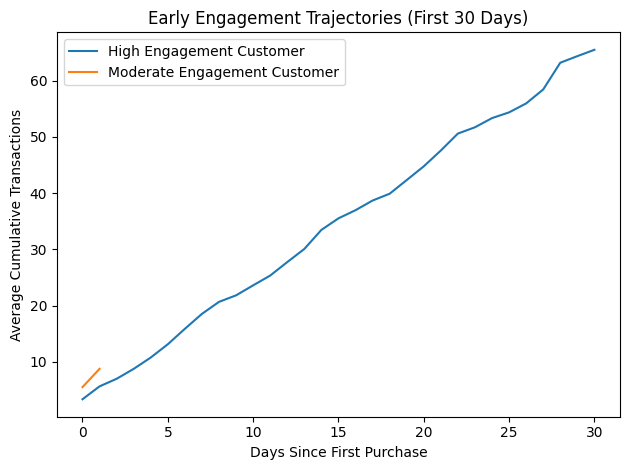

In [109]:
#putting avg cumulative transactions on the plot

fig, ax = plt.subplots()

sns.lineplot(
    data=trajectory,
    x="days_since_first_purchase",
    y="avg_cumulative_txns",
    hue="engagement_segment",
    ax=ax
)

ax.set_title("Early Engagement Trajectories (First 30 Days)")
ax.set_xlabel("Days Since First Purchase")
ax.set_ylabel("Average Cumulative Transactions")
plt.tight_layout()


#customizing the legend not to include title and to use custom labels
handles, labels = ax.get_legend_handles_labels()

ax.legend(
    handles=handles,
    labels=[
        "High Engagement Customer",
        "Moderate Engagement Customer"
    ],
    title=None
)


Customers from the high engagement group show a rapid and sustained increase in cumulative transactions, indicating fast and consistent activity after entry. 

Moderate engagement customers display their activity very early, and then they disengage.

These trajectories imply that differences in engagement intensity emerge early in the customer lifecycle.


## **Key Takeaways**

- Customers exhibit moderate to high engagement within their first 30 days.

- Engagement intensity differences emerge early and persist throughout the first 30 days, suggesting different early lifecycle trajectories.
